<a href="https://colab.research.google.com/github/Mercymerine/Machine_learning2/blob/main/wheat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Getting the dataset**

In [19]:
import pathlib
import zipfile
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os

In [2]:
!kaggle datasets download -d abdallahalidev/plantvillage-dataset


Dataset URL: https://www.kaggle.com/datasets/abdallahalidev/plantvillage-dataset
License(s): CC-BY-NC-SA-4.0
100% 2.03G/2.04G [00:23<00:00, 192MB/s]
100% 2.04G/2.04G [00:23<00:00, 93.4MB/s]


In [4]:
input_dir = pathlib.Path('/content/plantvillage-dataset.zip')

In [7]:
#Unzip the download file

zip_ref = zipfile.ZipFile('plantvillage-dataset.zip', 'r')
zip_ref.extractall()
zip_ref.close()

In [11]:
!ls plantvillage dataset

ls: cannot access 'plantvillage': No such file or directory
ls: cannot access 'dataset': No such file or directory


In [12]:
!ls plantvillage dataset/color

ls: cannot access 'plantvillage': No such file or directory
ls: cannot access 'dataset/color': No such file or directory


In [14]:
import pathlib
#Checking for images in the folder
wheat_data_dir = pathlib.Path('/content/plantvillage dataset/color')

image_count = len(list(wheat_data_dir.glob('*/*.jpg')))
print(image_count)

1500


In [16]:
#Get the class names
data_dir = pathlib.Path('/content/plantvillage dataset/color')
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)


['Apple___Apple_scab' 'Apple___Black_rot' 'Apple___Cedar_apple_rust'
 'Apple___healthy' 'Blueberry___healthy'
 'Cherry_(including_sour)___Powdery_mildew'
 'Cherry_(including_sour)___healthy'
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot'
 'Corn_(maize)___Common_rust_' 'Corn_(maize)___Northern_Leaf_Blight'
 'Corn_(maize)___healthy' 'Grape___Black_rot'
 'Grape___Esca_(Black_Measles)'
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)' 'Grape___healthy'
 'Orange___Haunglongbing_(Citrus_greening)' 'Peach___Bacterial_spot'
 'Peach___healthy' 'Pepper,_bell___Bacterial_spot'
 'Pepper,_bell___healthy' 'Potato___Early_blight' 'Potato___Late_blight'
 'Potato___healthy' 'Raspberry___healthy' 'Soybean___healthy'
 'Squash___Powdery_mildew' 'Strawberry___Leaf_scorch'
 'Strawberry___healthy' 'Tomato___Bacterial_spot' 'Tomato___Early_blight'
 'Tomato___Late_blight' 'Tomato___Leaf_Mold' 'Tomato___Septoria_leaf_spot'
 'Tomato___Spider_mites Two-spotted_spider_mite' 'Tomato___Target_Spot'
 'Tomato___Tom

In [20]:
# View an image
def view_random_image(target_dir, target_class):
  target_folder = os.path.join(target_dir, target_class)

  #Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  #Read the images and plot it with plt
  img = mpimg.imread(target_folder + '/' + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off')
  print(f'Image shape: {img.shape}')

  return img



Image shape: (256, 256, 3)


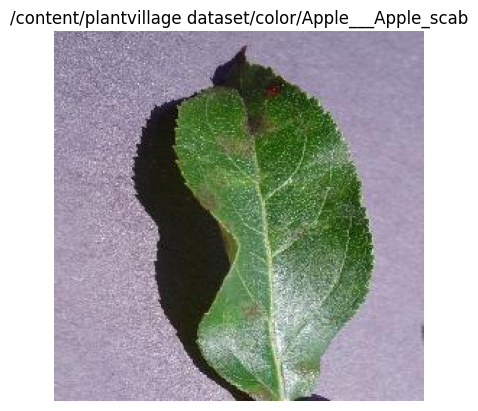

In [21]:
#View a random image from the dataset
img = view_random_image('/content/plantvillage dataset/color', target_class = '/content/plantvillage dataset/color/Apple___Apple_scab')

Image shape: (256, 256, 3)


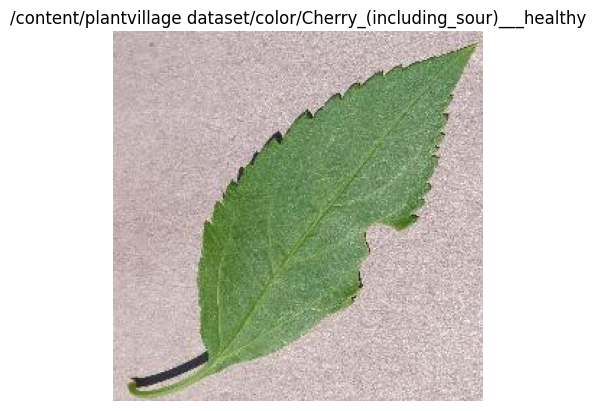

In [22]:
#View a random image from the dataset
img = view_random_image('/content/plantvillage dataset/color', target_class = '/content/plantvillage dataset/color/Cherry_(including_sour)___healthy')

In [23]:
img/255.

array([[[0.8       , 0.7372549 , 0.74117647],
        [0.71764706, 0.65490196, 0.65882353],
        [0.82745098, 0.76470588, 0.76862745],
        ...,
        [0.76862745, 0.72156863, 0.72941176],
        [0.84705882, 0.80784314, 0.81176471],
        [0.87058824, 0.83137255, 0.83529412]],

       [[0.75686275, 0.69411765, 0.69803922],
        [0.77254902, 0.70980392, 0.71372549],
        [0.74901961, 0.68627451, 0.69019608],
        ...,
        [0.8627451 , 0.81568627, 0.81568627],
        [0.77254902, 0.73333333, 0.7372549 ],
        [0.63137255, 0.59215686, 0.58823529]],

       [[0.76078431, 0.69803922, 0.70196078],
        [0.69019608, 0.62745098, 0.63137255],
        [0.71372549, 0.65098039, 0.65490196],
        ...,
        [0.80784314, 0.76470588, 0.75686275],
        [0.72941176, 0.69019608, 0.68627451],
        [0.96470588, 0.9254902 , 0.91764706]],

       ...,

       [[0.79607843, 0.75686275, 0.74901961],
        [0.84313725, 0.80392157, 0.79607843],
        [0.78431373, 0

## **Splitting the dataset into os and shutil**

In [25]:
import shutil
from sklearn.model_selection import train_test_split

In [ ]:
#Define the source directory containing images and destination directories
source_dir = '/content/plantvillage dataset/color'
train_dir = 'content/train'
val_dir = 'content/val'
test_dir = 'content/test'

#Create train, validation and test directories
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)
os.makedirs(test_dir, exista_ok=True)

#Iterate through each class folder
for class_folder in os.listdir(source_dir):
  class_path = os.path.join